# Shaping de la forward curve markit

## Forward Curve TGP

In [124]:
# on recupere la donnee en time serie de KDB
from kdb import *
import pandas as pd
from ratios.ratio import Ratio
from ratios.scope import Scope
from ratios.ratio import Ratio
from ratios.profiles.filters.filter import Filter
from ratios.smoothings.smoothing import Smoothing
from ratios.smoothings.integral_cubic_spline import IntegralCubicSpline
from ratios.profiles.baseload import Baseload
from ratios.profiles.filters.hours import Hours
from ratios.profiles.filters.months import Months
from ratios.profiles.filters.years import Years
from ratios.profiles.off_peak import OffPeak, OverlappingIndexesPeakAndOffPeak
from ratios.profiles.peak import Peak
from ratios.scope import Scope

datar = Markit(date = "2022-09-20", index = "FRANCE_BL")
datar.sort_values(by = ["Start Date"], axis=0, ascending=True)
datar.head(20)

Data retrieved from kdb for 2022-09-20


,Markit,TGP
Start Date,,
2022-10-01,470.771441,470.000000
2022-11-01,1021.479347,1040.000000
2022-10-01,961.215777,955.000000
2022-12-01,1392.305907,1357.741935
2023-01-01,1180.127663,1171.602313
2023-02-01,1103.600767,1067.868417
2023-01-01,1002.199926,1010.000000
2023-03-01,735.141852,796.129439
2022-10-01,981.725025,982.197802


In [125]:
data_fr = kdb('2022-09-20', "FRANCE_BL").sort_values(by = ["Start Date"], axis=0, ascending=True)
data_fr = data_fr.loc[data_fr["Contract type"] == "Month", :]
data_fr_cal = data_fr.loc[data_fr["Contract type"] == "Year", :]

data_fr.head(20)
#data_fr = data_fr["Markit"]

Data retrieved from kdb for 2022-09-20


,Index,Start Date,Contract type,TGP,Markit,Markit Std,EEX,Ice,Skylight,Risk,Rule,Validation_status,Comment
Date,,,,,,,,,,,,,
2022-09-20,FRANCE_BL,2022-10-01,Month,470.000000,470.771441,2.117935,456.01,469.80,470.958363,1873.939568,fixed-0.10.1,Validated,Within trayport Bid and trayport Ask
2022-09-20,FRANCE_BL,2022-11-01,Month,1040.000000,1021.479347,2.606417,1019.01,1019.80,1024.666362,-33265.931592,fixed-0.10.1,Validated,Within spectronpower Bid and spectronpower Ask
2022-09-20,FRANCE_BL,2022-12-01,Month,1357.741935,1392.305907,9.393429,1380.78,1381.80,1396.539707,-134145.652343,fixed-0.10.1,Validated,4. Ok as quarter is ok
2022-09-20,FRANCE_BL,2023-01-01,Month,1171.602313,1180.127663,42.656386,1200.00,1254.43,1203.198999,497695.182939,fixed-0.10.1,Validated,Within trayport Bid and trayport Ask
2022-09-20,FRANCE_BL,2023-02-01,Month,1067.868417,1103.600767,51.076172,1147.54,1153.09,1141.852300,447771.835577,fixed-0.10.1,Validated,4. Ok as quarter is ok
2022-09-20,FRANCE_BL,2023-03-01,Month,796.129439,735.141852,81.595433,662.65,738.40,682.807723,496740.672325,fixed-0.20.2,Validated,4. Ok as quarter is ok
2022-09-20,FRANCE_BL,2023-04-01,Month,407.480834,406.960986,12.743426,NaN,475.16,408.071132,60500.429082,fixed-0.20.2,Validated,4. Ok as quarter is ok
2022-09-20,FRANCE_BL,2023-05-01,Month,355.779454,352.389473,6.539498,NaN,431.31,360.112909,67912.935606,fixed-0.20.2,Validated,4. Ok as quarter is ok
2022-09-20,FRANCE_BL,2023-06-01,Month,376.957263,374.597804,7.388813,NaN,415.85,374.582653,83641.204636,fixed-0.20.2,Validated,4. Ok as quarter is ok


In [126]:
data_fr_cal.set_index("Start Date", inplace = True)
data_fr_cal.head(20)
data_fr_cal = data_fr["Markit"]

In [127]:
data_fr.set_index("Start Date", inplace = True)
data_fr.head(20)
data_fr = data_fr["Markit"]

In [128]:
data_fr.head(100)

Start Date
2022-10-01     470.771441
2022-11-01    1021.479347
2022-12-01    1392.305907
2023-01-01    1180.127663
2023-02-01    1103.600767
                 ...     
2030-02-01            NaN
2030-03-01            NaN
2030-04-01            NaN
2030-05-01            NaN
2030-06-01            NaN
Name: Markit, Length: 93, dtype: float64

In [129]:
# First we define a {Baseload}
auction = auctions_kdb()
historical_baseload = Baseload(data_fr)

# On calcule ici le ratio de prix par annee entre les quarters et les mois 
# Line is Denominator when Column is Nominator
ratio_month_day = Ratio(historical_baseload,  #on peut utiliser les filtres par annees, quarters, mois .filter_(Years([2022,2023,2024])
                        line_scope=[Scope.YEAR_NUMBER],
                        column_scope=[Scope.QUARTER]) \
    .compute(numerator_computing_scope=[Scope.YEAR_NUMBER, Scope.QUARTER]).evaluate()

print(ratio_month_day.matrix_rate)

Start Date         1         2         3         4
Start Date                                        
2023        1.729336  0.649573  0.623248  0.997843
2024        2.023845  0.515103  0.488942  0.972110
2025        1.310888  0.753911  0.789853  1.145348
2026        1.328738  0.758924  0.779344  1.132994
2027        1.264631  0.802273  0.811748  1.121348
2028        1.255631  0.862777  0.881592       NaN
2022             NaN       NaN       NaN  1.000000


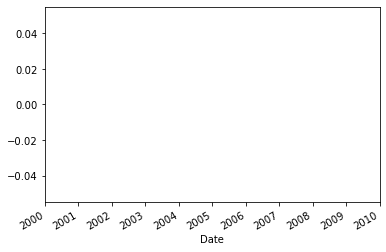

In [132]:
Baseload(data_fr_cal).shape(ratio_month_day)
# Plot the peak data
Baseload(data_fr_cal).shape(ratio_month_day).data.plot()
plt.show()

TIMELINE               2016      2017      2018      2019
TIMELINE TIMELINE                                        
2016     1         1.515349       NaN       NaN       NaN
         2         1.268523       NaN       NaN       NaN
         3         1.235716       NaN       NaN       NaN
         4         0.917230       NaN       NaN       NaN
2017     1              NaN  0.794155       NaN       NaN
         2              NaN  0.969154       NaN       NaN
         3              NaN  1.155619       NaN       NaN
         4              NaN  0.969582       NaN       NaN
2018     1              NaN       NaN  0.996769       NaN
         2              NaN       NaN  0.894072       NaN
         3              NaN       NaN  0.697119       NaN
         4              NaN       NaN  0.874264       NaN
2019     1              NaN       NaN       NaN  0.924495
         2              NaN       NaN       NaN  0.942173
         3              NaN       NaN       NaN  1.122409
         4    

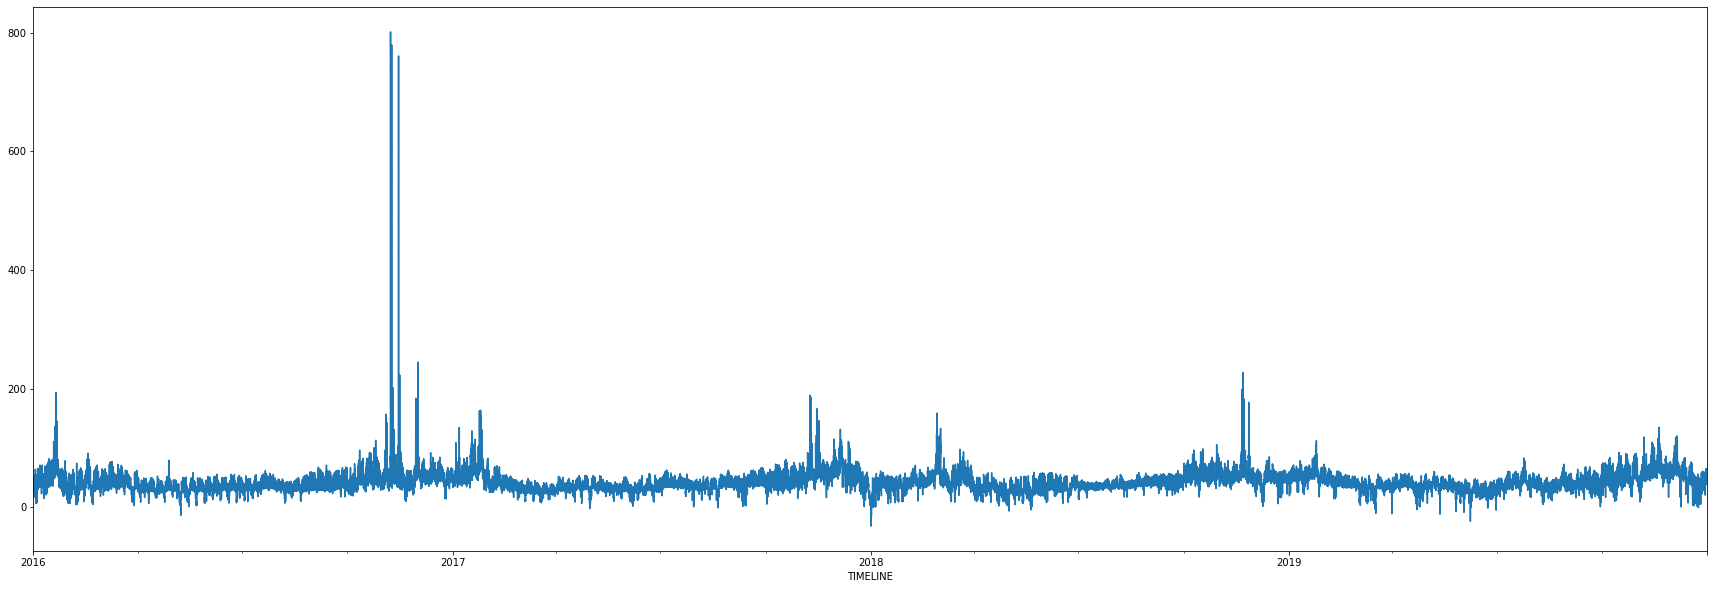

In [ ]:
# First we define a {Baseload}
auction = auctions_kdb()
historical_baseload = Baseload(auction["AUCTION_PRICE"])

# On calcule ici le ratio de prix par annee entre les quarters et les mois 
# Line is Denominator when Column is Nominator
ratio_month_day = Ratio(historical_baseload,  #on peut utiliser les filtres par annees, quarters, mois .filter_(Years([2022,2023,2024])
                        line_scope=[ Scope.YEAR_NUMBER, Scope.QUARTER],
                        column_scope=[Scope.YEAR_NUMBER]) \
    .compute(numerator_computing_scope=[ Scope.MONTH_NUMBER]).evaluate()

print(ratio_month_day.matrix_rate)

plt.figure(figsize = (30, 10))

# Given a pandas timeseries such as `forward_hourly_timeserie`

# First we create a {Baseload} and apply smoothing using {Scope}s.
peak = Peak(auction["AUCTION_PRICE"])#.smooth(IntegralCubicSpline([Scope.YEAR_NUMBER, Scope.MONTH_NUMBER]))

# Second we define the {Peak} based on the `forward_baseload`
# we define it by filtering to get only {Hours} 1 and 3 and the {Weekdays} Saturday.

# Let's shape the peak with the ratio_month_day 
peak.shape(ratio_month_day)

# Plot the peak data
peak.data.plot()
plt.show()
